# AutoSell - A platform for selling your used car

The dataset *used_cars.csv* contains information about cars that customers have sold or are trying to sell via AutoSell in 2023.

# Table of Contents

**AutoSell - A platform for selling your used car**

**Q1: Preprocessing the data set**

**Q2: Exploring the data set**
- **(a) Exploration of the target feature**
- **(b) Exploration of correlations**
    - (i) Correleation with numerical attributes
    - (ii) Univariate correlations with categorical attributes
    - (iii) Multivariate correlations with categorical attributes

**Q3: Predicting prices**
- **(a) Baseline**
- **(b) Prediction by classification**
    - (i) Price binning
    - (ii) Data transformation for decision trees
    - (iii) Model training
    - (iv) Price prediction
- **(c) Prediction by clustering**
    - (i) Data transformation for clustering
    - (ii) Computing the distance matrix
    - (iii) Applying DBSCAN
    - (iv) Price prediction
- **(d) Prediction by regression and with neural networks**
    - (i) Feature engineering
    - (ii) Feature selection
    - (iii) Data transformation for regression and neural networks
    - (iv) Model training function
    - (v) Linear regression
    - (vi) Regression with non-linear kernels
    - (vii) Neural networks
- **(e) Discussion**


**Q4: Predicting time-to-sale**
- **(a) Data preparation**
    - (i) Target feature creation
    - (ii) Sensitivity and specificity
    - (iii) Data transformation for classification problem
- **(b) Classifiers**
    - (i) Model training
    - (ii) Evaluation Part 1
    - (iii) Evaluation Part 2
- **(c) Discussion**


In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Q1: Preprocessing the data set

Using the file *used_cars.csv*, create a dataframe.

In [58]:
df = pd.read_csv('used_cars.csv')

Provide the names of all columns that contain NaN values.

In [59]:
nan_columns = df.columns[df.isnull().any()].tolist()
print(nan_columns)

['fuel_type', 'accident', 'clean_title']


**Answer:** 

*Your answer here*

Display all rows containing NaN values.

In [60]:
nan_rows = df[df.isnull().any(axis=1)]
print(nan_rows)

        brand                                         model  model_year  \
2       Lexus                                 RX 350 RX 350        2022   
4        Audi                     Q3 45 S line Premium Plus        2021   
5       Acura                                      ILX 2.4L        2016   
9       Tesla                       Model X Long Range Plus        2020   
10       Land  Rover Range Rover Sport 3.0 Supercharged HST        2021   
...       ...                                           ...         ...   
3962   Toyota                               4Runner TRD Pro        2021   
3991  Porsche                                 Cayenne Turbo        2020   
3993  Porsche                                 911 Carrera S        2021   
3996    Aston                    Martin DB7 Vantage Volante        2003   
4006  Porsche                                        Taycan        2022   

           milage fuel_type  \
2      22,372 mi.  Gasoline   
4       9,835 mi.  Gasoline   
5     

You investigate the NaN values further. You decide to map the NaN values from the clean_title column to "No". Also, you map the NaN values of the accident column to "Unknown".

In [61]:
df['clean_title'].fillna('No', inplace=True)
df['accident'].fillna('Unknown', inplace=True)

Finally, you investigate the NaN values of the fuel_type column. To do so, you inspect the unique values of that column. What is your observation? Which general type of engine is accociated with NaN values in the fuel_type column?

In [62]:
unique_fuel_types = df['fuel_type'].unique()

print("Unique values in the 'fuel_type' column:", unique_fuel_types)

most_frequent_engine_type = df[df['fuel_type'].isnull()]['engine'].mode().iloc[0]
print("Most frequent engine type:", most_frequent_engine_type)

Unique values in the 'fuel_type' column: ['E85 Flex Fuel' 'Gasoline' 'Hybrid' nan 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
Most frequent engine type: Electric


**Answer:** 

Electric engine is associated the most with NaN values in the fuel_type column

Based on your former findings, you decide to map the NaN values of the column fuel_type to a value. Choose a suitable value.

In [63]:
# Fill out with the most freq fuel_type value

most_frequent_fuel_type = df['fuel_type'].mode()[0]
df['fuel_type'].fillna(most_frequent_fuel_type, inplace=True)

df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       '–', 'not supported'], dtype=object)

You investigate the other values of the fuel_type column. You decide to remove entries that either have *'–'* or *'not supported'* as values. 

In [64]:
df = df[~df['fuel_type'].isin(['–', 'not supported'])]
print(df['fuel_type'].unique())

['E85 Flex Fuel' 'Gasoline' 'Hybrid' 'Diesel' 'Plug-In Hybrid']


How many rows does your final dataframe have? Are there any NaN values left in the columns? 

In [65]:
print("Number of rows in the final df:", len(df))

nan_values = df.isnull().any()
print("NaN values in the columns:", nan_values)

Number of rows in the final df: 3962
NaN values in the columns: brand           False
model           False
model_year      False
milage          False
fuel_type       False
engine          False
transmission    False
ext_col         False
int_col         False
accident        False
clean_title     False
price           False
dtype: bool


**Answer:** 

Brand column still has NaN values

# Q2: Exploring the dataset

From now on, use the dataset `used_cars_preprocessed.csv`.

In [66]:
df = pd.read_csv("used_cars_preprocessed.csv")

In the following, you want to explore the dataset. 

## (a) Exploration of the target feature 

You are interested in automatically determining the price of a sold car. To do so, you apply your data science knowledge on predictions. You first create a boxplot concerning the price to get an initial impression of the distribution of this attribute. The boxplot should also show the mean. Are there outliers? What can you say about the spread prices? In addition, provide the average price, first and third quartile, and the standard deviation. 



Mean: 35113.58227131124
First quartile: 16000.0
Third quartile: 44998.5
Standard deviation: 27683.727120951815


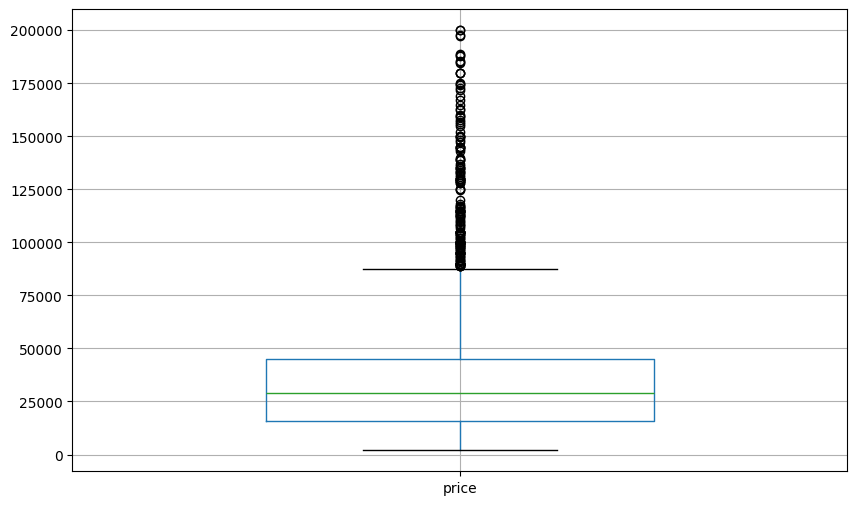

In [67]:
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column="price", widths=0.5)

# Statistics
print("Mean:", df['price'].mean())
print("First quartile:", df['price'].quantile(0.25))
print("Third quartile:", df['price'].quantile(0.75))
print("Standard deviation:", df['price'].std())

**Answer:** 

We have a bunch of outliers above the upper whisker and based on the plot we can clearly see the first and third quantiles and also the mean for 

To get deeper insight into the price distribution, you decide to create a histogram. Choose an appropriate number of bins to get an informative plot. What do you observe? 



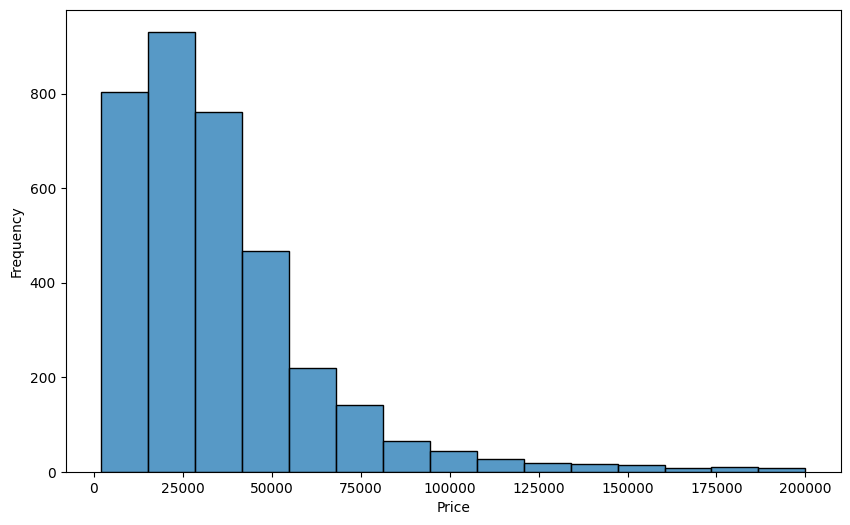

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=15)

plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

**Answer:** 
By setting the number of bins to 15, we see that the biggest range of price frequencies is achieved between 0 and 50000 dollars continuously declining and we can notice that there is only a tiny portion for the expensive cars (150000 - 200000) 

## (b) Exploration of correlations

Next, you want to investigate possible correlations of other variables with the target feature.

### (i) Correleation with numerical attributes

To do so, you create a correlation matrix of the numeric values of dataset. Intepret the correlation values you found between price and *model_year*, *milage*, *horsepower*, *litres*, and *cylinders*. 



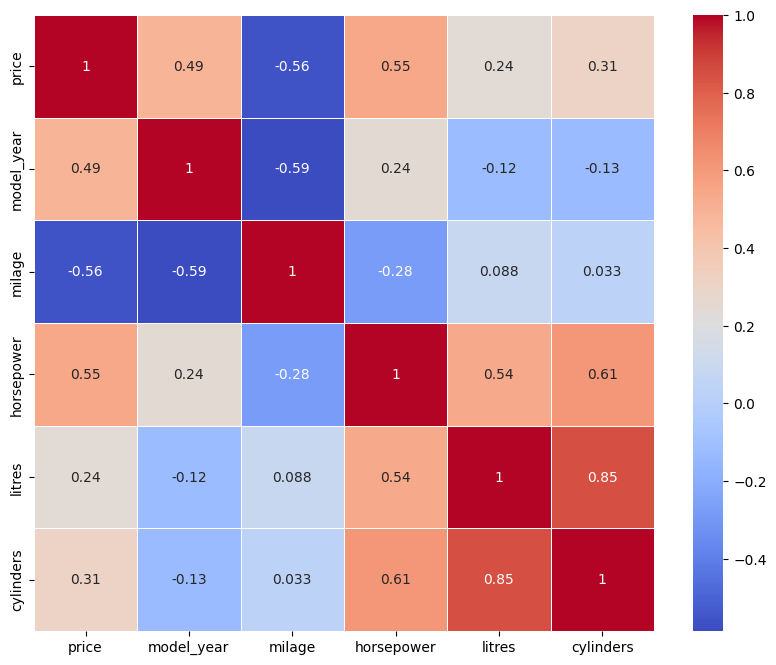

In [69]:
corr = df[['price', 'model_year', 'milage', 'horsepower', 'litres', 'cylinders']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

**Answer:**
To get a better understanding of the correlation between different features we visualize it in the form of a heatmap. Warmer (close to red) colors indicate a strong correlation between features (as one feature value increases, the other one does so as well) and colder colors (close to blue) indicate the opposite (as one feature increases the other one decreases) and if the correlation is in between (around 0) there's either weak or no correlation.

We can see a strong positive correlation between litres and cylinders, cylinders and horsepower and a very weak correlation between horsepower and model_year, liters and price, which totally makes sense. We also see more horsepower usually costs more.


### (ii) Univariate correlations with categorical attributes

In the following, you consider the categorical attributes. You start with *brand*, *fuel_type*, *accident*, and *clean_title*. Create boxplots for these features to capture the relationship with *price*, also showing the mean. What do you observe? Are there feature values for which you can clearly identify a relationship to the price attribute? Also, comment on the outliers and potential distribution inside a value's prices. Be brief in your answers. 

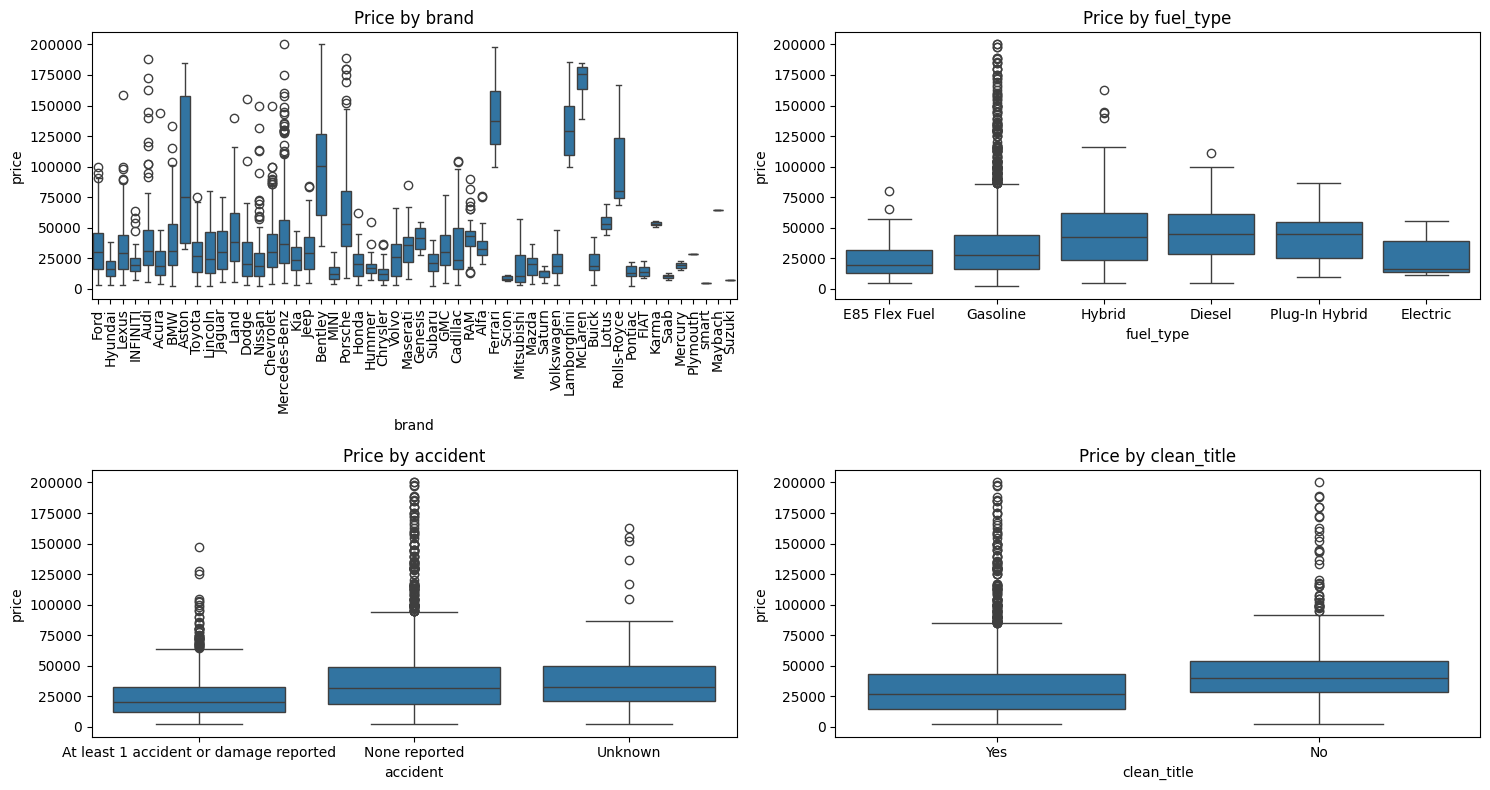

In [70]:
categorical_columns = ['brand', 'fuel_type', 'accident', 'clean_title']

# Create boxplots for each categorical column
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price by {col}')
    if col == 'brand':
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Answer:**
1. By looking at Price by brand boxplot we can clearly see that more luxury car brands, such as Aston, Bentley, Rolls-Royce, Ferrari, etc are way higher up than the other car brands and cheaper car brands being lower.
2. Price by fuel type shows that "Gasoline" fuel type has the most outliers, meaning that Gasoline type cars are quite cheap, but since a lot of sport cars are expensive and run on Gasoline, they are probably outliers.
3. "At least 1 accident or damage reported" are usually related to cheaper cars and "None reported" to expensive cars. We can infer that drivers of cheaper cars are usually more careless than drivers of expensive cards.
4. Unclear car titles are usually associated with higher price compared to clear titles.


### (iii) Multivariate correlations with categorical attributes

As the current analysis provides limited insight, you want to include a multivariate view using boxplots that also show the mean. Again, you decide on *brand*, *fuel_type*, *accident*, and *clean_title* as features. You create a boxplot for each pair of features with *price* still being your target. Based on these, provide a **superficial** conclusion. Each of the following cells focuses on one feature in particular. 

*Hint*: You may want to use Seaborn's boxplot functionality while fixing the hue to each feature mentioned in the following cells (for inspiration, see, e.g., Seaborn's gallery: https://seaborn.pydata.org/examples/index.html)



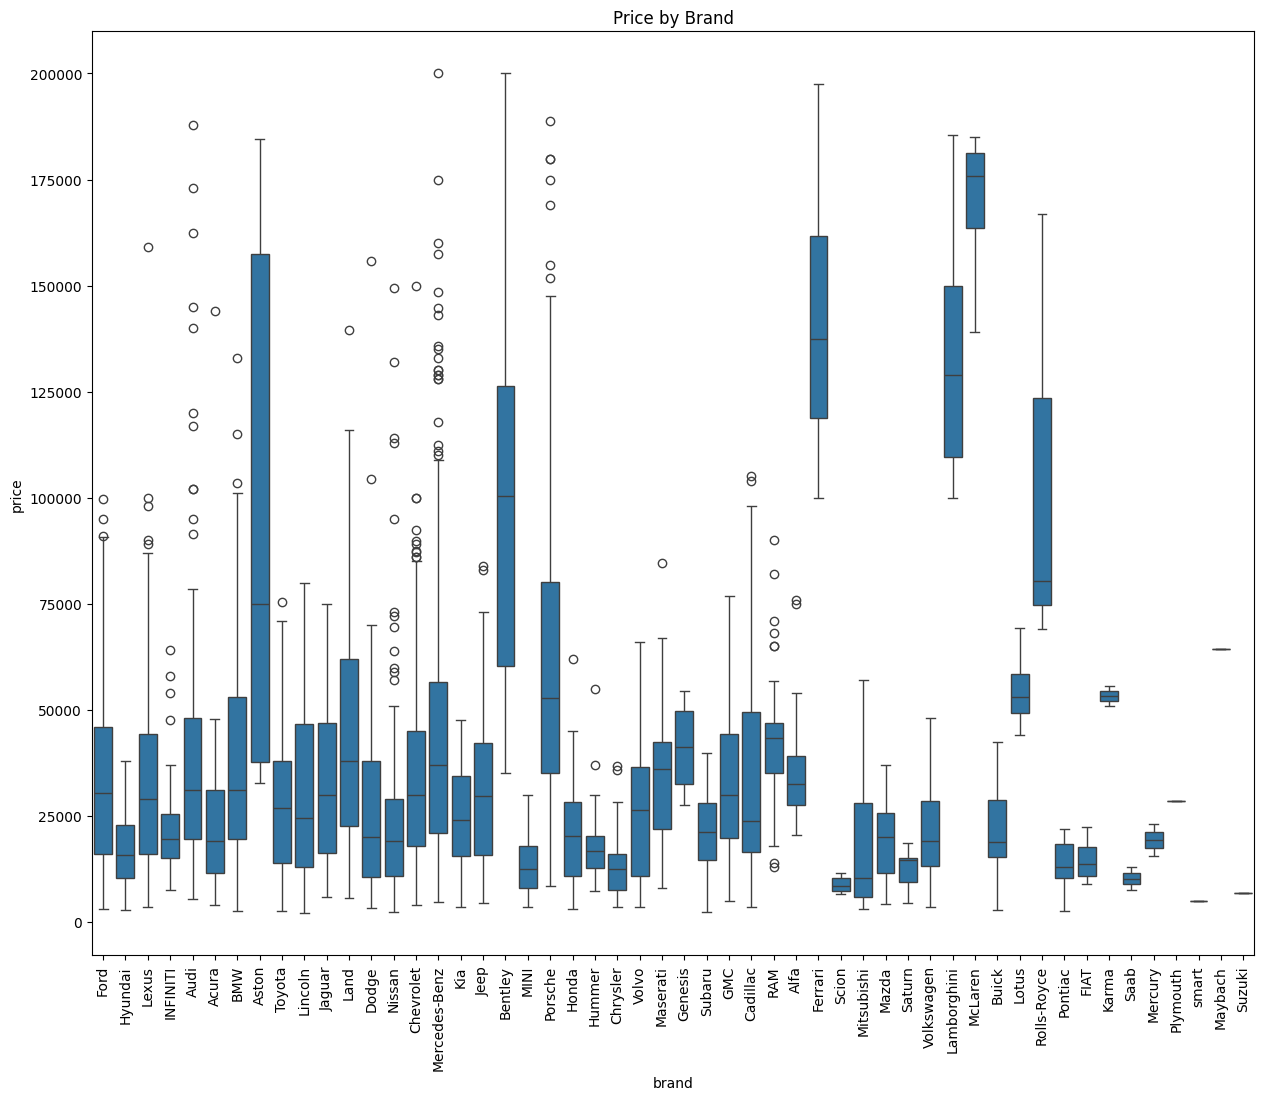

In [71]:
# Multivariate analysis for brand

plt.figure(figsize=(15, 12))
sns.boxplot(x='brand', y='price', data=df)
plt.title('Price by Brand')
plt.xticks(rotation=90)
plt.show()

**Answer:**

As before we see that luxury car brands have the highest price range. Mercedes-Benz has a diverse line-up in terms of price range - there are a lot of affordable cars, but also the expensive ones represented as outliers. 
Also we can spot that it's hard estimate price range for car brands like "Plymouth", "Maybach" and "Suzuki", because we only have few entries for them.

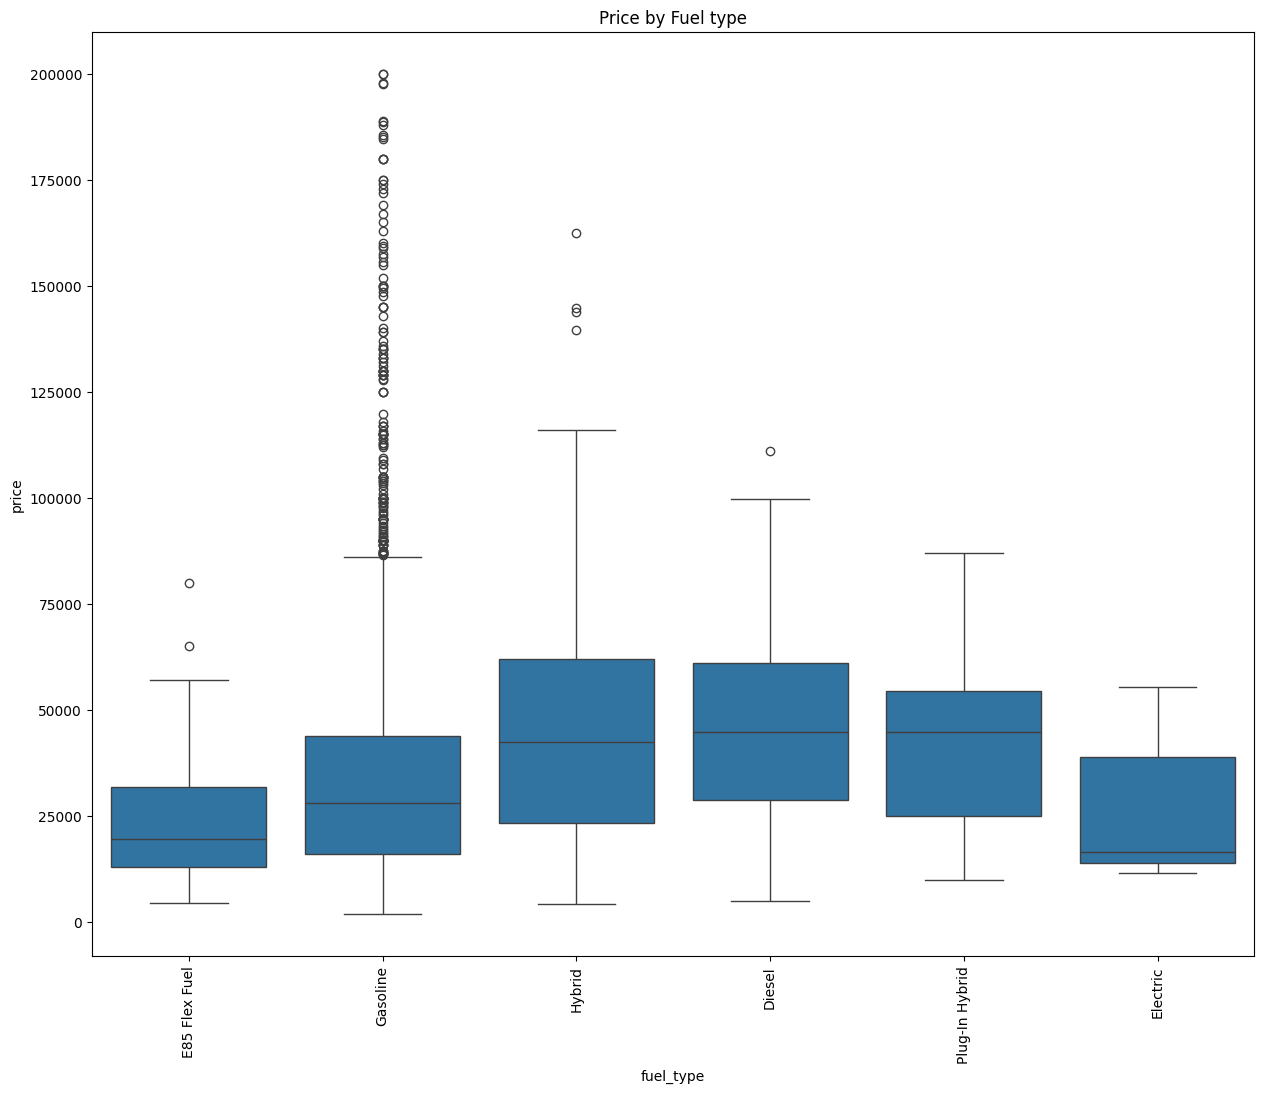

In [72]:
# Multivariate analysis for fuel_type

plt.figure(figsize=(15, 12))
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title('Price by Fuel type')
plt.xticks(rotation=90)
plt.show()

**Answer:**

As before there are the most outliers for "Gasoline" fuel type, because most of the gasoline cars are cheap, but also sport cars that are expensive run on gasoline.
Electric cars have the most consistent price range compared to the other fuel types.

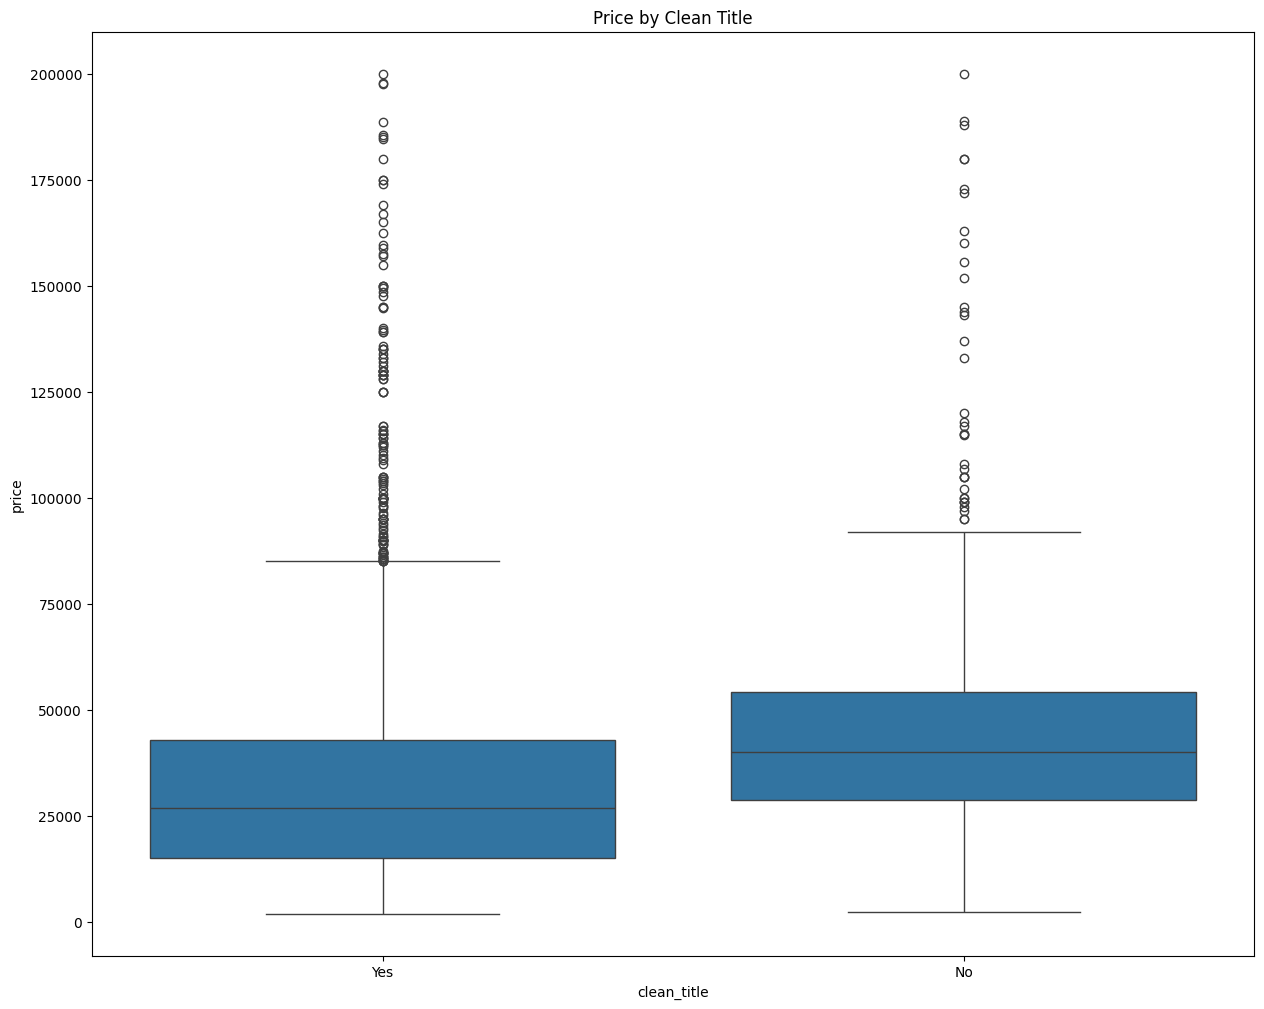

In [73]:
# Multivariate analysis for clean_title
plt.figure(figsize=(15, 12))
sns.boxplot(x='clean_title', y='price', data=df)
plt.title('Price by Clean Title')
plt.show()

**Answer:**

Car brands with more complicated titles are usually more expensive compared to car brands with clean titles.

# Q3: Predicting prices

After a long day at the office, you and N. go to a local bar to catch up with your old friend W. Over a round of cold drinks, you begin to share the great news about your booming business. Being an expert in data analytics himself, W. is also curious to hear your plans to apply your data science knowledge.

"I've been thinking about selling my old Porsche to make room for a new one," W. says to you. "I'm wondering what price to set for the old one. This is the perfect opportunity for you to try out your new predictive models, don't you think?"

You agree! W. writes down the properties of his Porsche (in the following, also referred to as *target car*) on a napkin. You tell W. that you will call him as soon as you can make a confident estimate for the price of his car. The next morning, you immediately start working on predictive models for car prices.
If not sated otherwise, you use the entire pre-processed dataset to create each of the models - load the dataset new at the beginning of every partial question a), b),...d) so you don't accidentally use data you have changed for a different kind of model. 


In [74]:
car = pd.DataFrame([{
      "brand": "Porsche",
      "model":  "911 Carrera S",
      "model_year": 2015,
      "milage": 84500.0,
      "fuel_type": "Gasoline",
      "engine": "400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel",
      "transmission": "7-Speed A/T",
      "ext_col": "Black",
      "int_col": "Black",
      "accident": "None reported",
      "clean_title": "Yes",
      "horsepower": 400.0,
      "litres": 3.8,
      "cylinders": 6.0
}])

## (a) Baseline 

First, you want to set a baseline to compare against. The baseline should always use the average price of all cars as a recommended price. Use the pre-processed dataset and the `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. To stay consistent, the same split between training and test set should be used throughout the entire assignment.

What are the values of the mean absolute error and the root-mean-squared error? 



In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('used_cars_preprocessed.csv')
train_set, test_set = train_test_split(df, test_size=0.05, random_state=3)
average_price = train_set['price'].mean()
predicted_prices = np.full(shape=test_set['price'].shape, fill_value=average_price)
mae = mean_absolute_error(test_set['price'], predicted_prices)
rmse = np.sqrt(mean_squared_error(test_set['price'], predicted_prices))
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 20509.64840362633
Root Mean Squared Error: 30579.40498322031


## (b) Prediction by classification

Next, you try to price your car according to similar cars using a decision tree.

### (i) Price binning

In the following, we want to know the price ranges for selling cars. To use decision trees, you need to discretize prices. We use the following price bins:
- [1,800, 10,000]
- (10,000, 20,000]
- (20,000, 30,000]
- (30,000, 40,000]
- (40,000, 50,000]
- (50,000, 60,000]
- (60,000, 80,000]
- (80,000, 100,000]
- (100,000, 120,000]
- (120,000, 140,000]
- (140,000, 160,000]
- (160,000, 180,000]
- (180,000, 220,000]

Add the attribute *Price_Bins* to the entire pre-processed data set using the discretization mentioned above for each car. For example, if a car costs 2500, it is put into the bin [1,800, 10,000]. 



In [76]:
# Your code here
bins = [1800, 10000, 20000, 30000, 40000, 50000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 220000]
labels = ['[1,800, 10,000]', '(10,000, 20,000]', '(20,000, 30,000]', '(30,000, 40,000]', '(40,000, 50,000]', 
          '(50,000, 60,000]', '(60,000, 80,000]', '(80,000, 100,000]', '(100,000, 120,000]', 
          '(120,000, 140,000]', '(140,000, 160,000]', '(160,000, 180,000]', '(180,000, 220,000]']
df['Price_Bins'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,litres,cylinders,Price_Bins
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,300.0,3.7,6.0,"(10,000, 20,000]"
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,White,Gray,At least 1 accident or damage reported,Yes,38005,318.0,3.8,6.0,"(30,000, 40,000]"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,54598,336.0,3.5,6.0,"(50,000, 60,000]"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500,354.0,3.5,6.0,"(10,000, 20,000]"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Green,Black,None reported,No,34999,333.0,2.0,4.0,"(30,000, 40,000]"


You predicted a price range for cars. However, since you cannot enter a price range for selling a car, you have to map each bin to a value. To do so, you use the mean of bins to predict the price. For example, the bin (10,000, 20,000] is mapped to 15,000. Create a dictionary you can use for this mapping. 



In [77]:
# Your code here
bin_means = {
    '[1,800, 10,000]': (1800 + 10000) / 2,
    '(10,000, 20,000]': (10000 + 20000) / 2,
    '(20,000, 30,000]': (20000 + 30000) / 2,
    '(30,000, 40,000]': (30000 + 40000) / 2,
    '(40,000, 50,000]': (40000 + 50000) / 2,
    '(50,000, 60,000]': (50000 + 60000) / 2,
    '(60,000, 80,000]': (60000 + 80000) / 2,
    '(80,000, 100,000]': (80000 + 100000) / 2,
    '(100,000, 120,000]': (100000 + 120000) / 2,
    '(120,000, 140,000]': (120000 + 140000) / 2,
    '(140,000, 160,000]': (140000 + 160000) / 2,
    '(160,000, 180,000]': (160000 + 180000) / 2,
    '(180,000, 220,000]': (180000 + 220000) / 2
}
print(bin_means)

{'[1,800, 10,000]': 5900.0, '(10,000, 20,000]': 15000.0, '(20,000, 30,000]': 25000.0, '(30,000, 40,000]': 35000.0, '(40,000, 50,000]': 45000.0, '(50,000, 60,000]': 55000.0, '(60,000, 80,000]': 70000.0, '(80,000, 100,000]': 90000.0, '(100,000, 120,000]': 110000.0, '(120,000, 140,000]': 130000.0, '(140,000, 160,000]': 150000.0, '(160,000, 180,000]': 170000.0, '(180,000, 220,000]': 200000.0}


### (ii) Data transformation for decision trees

You want to apply a decision tree to predict the price. You decide to use *brand*, *fuel_type*, *model_year*, *accident* and *clean_title* as descriptive features and *Price_Bins* as the target feature. 

You split the data into a train and test set. For the train-test split, use `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`

In order to apply the sklearn method for decision trees, you need to encode the categorical variables. For the encoding, use the `OneHotEncoder` from *sklearn* with `sparse_output=False`.
  
*Hint*: You later need the continous prices of your test set to compute errors, so better store them.

*Hint*: Applying `get_feature_names_out()` on your encoder provides you a list of columns after the transformation.



In [78]:
from sklearn.model_selection import train_test_split

categorical_features = ['brand', 'fuel_type', 'accident', 'clean_title']
df_encoded = pd.get_dummies(df, columns=categorical_features)
target = 'Price_Bins'
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=3)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (3354, 74)
Test set shape: (177, 74)


### (iii) Model training

In the following, you want to use a good deicision tree for predicting prices. To do so,you want to test a set of different values, in particular, max depth of a tree. You test values in [1, 9] (in steps of size one).

You use the the algorithm from the *sklearn* library. You set as criterion "entropy", `min_samples_leaf=6`, and `random_state=42`.

Your goal is to minimize the mean absolute error. Create the prediction using the bins and only apply the dictionary mapping the bins to means to the predicted values before calculating the error. 

Create a summarizing plot, in which the x-axis represents the maximum tree depth, and the y-axis the mean absolute error as well as the root-mean-square error.



Non-numeric columns found: Index(['ext_col', 'int_col'], dtype='object')


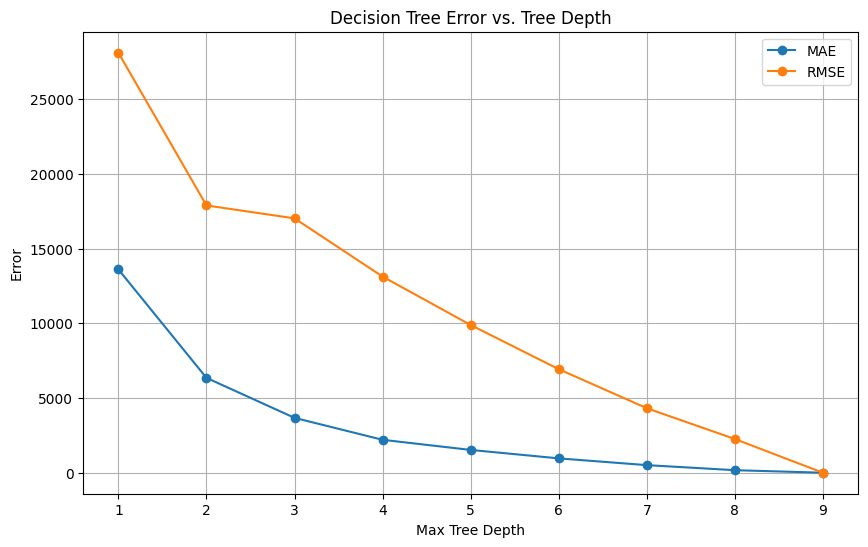

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree

categorical_features = ['brand', 'fuel_type', 'accident', 'clean_title']
df_encoded = pd.get_dummies(df, columns=categorical_features)
df_encoded = df_encoded.drop(columns=['model', 'engine', 'transmission'])
non_numeric_columns = df_encoded.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print("Non-numeric columns found:", non_numeric_columns)
    df_encoded = df_encoded.drop(columns=non_numeric_columns)

X = df_encoded.drop('Price_Bins', axis=1)
y = df_encoded['Price_Bins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=3)
mae_list = []
rmse_list = []
# Loop over tree depths
for depth in range(1, 10):
    decision_tree = tree.DecisionTreeClassifier(criterion="entropy", 
                                                max_depth=depth, 
                                                min_samples_leaf=6, 
                                                random_state=42)
    decision_tree.fit(X_train, y_train)
    predicted_bins = decision_tree.predict(X_test)
    predicted_prices = [bin_means[bin_label] for bin_label in predicted_bins]
    true_prices = y_test.replace(bin_means)
    mae = mean_absolute_error(true_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(true_prices, predicted_prices))
    mae_list.append(mae)
    rmse_list.append(rmse)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), mae_list, label='MAE', marker='o')
plt.plot(range(1, 10), rmse_list, label='RMSE', marker='o')
plt.xlabel('Max Tree Depth')
plt.ylabel('Error')
plt.title('Decision Tree Error vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

Condider your plot, which setting minimizes the mean absolute error and which minimizes the root-mean-square error? Which tree depth would you favorize and what are the error values? Round to the second decimal.  



**Answer:**

For minimum mean absolute error the tree depth should be 9 with a mae of 0.00. For minimal root mean square error the tree depth should also be 9 with a rmse of 0.00.

Create and plot the tree. What is the first attribute to split on? 




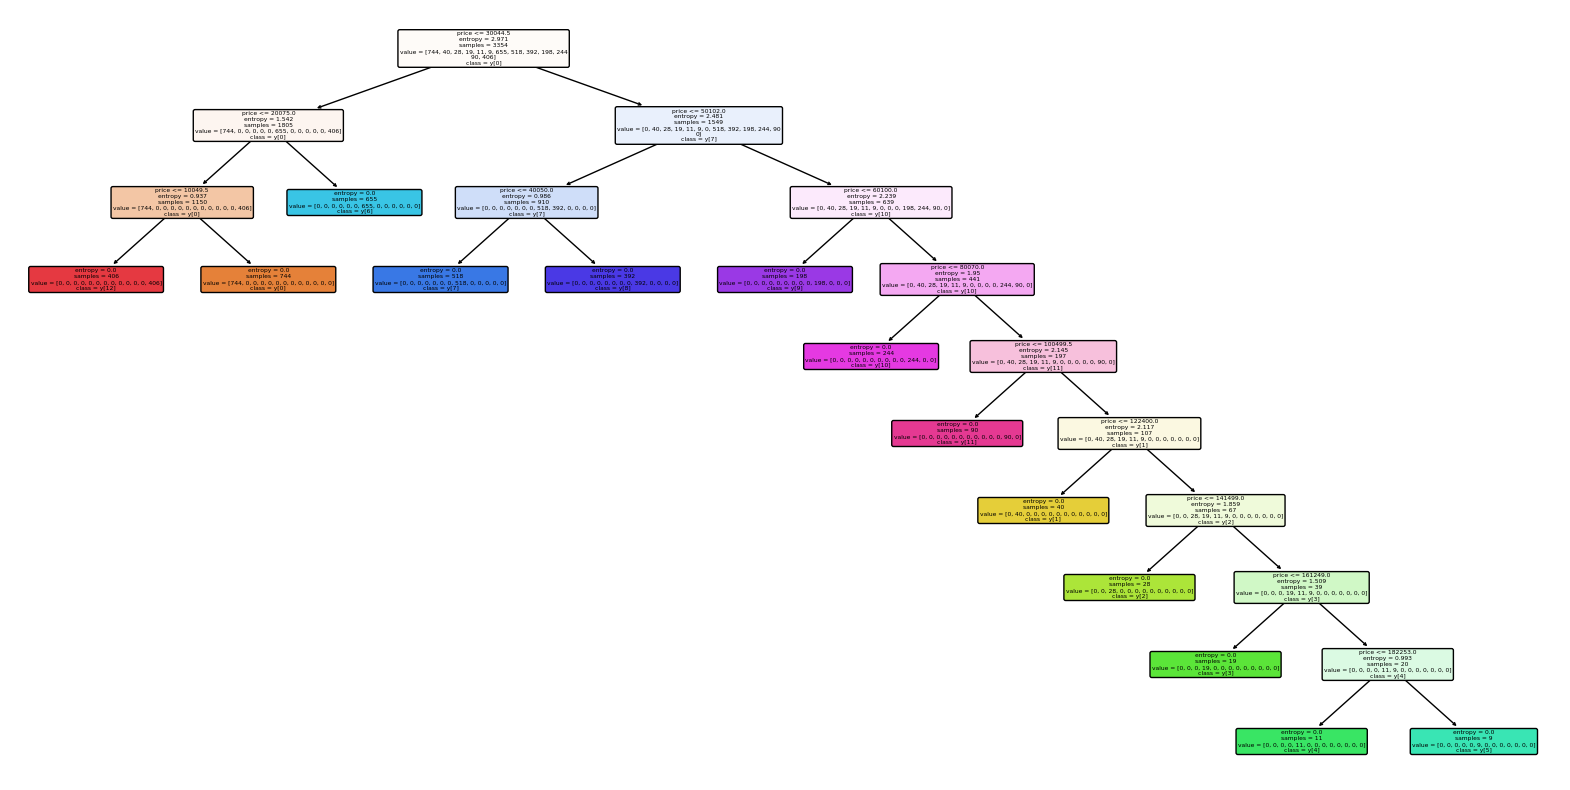

In [80]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

optimal_depth = 9 
decision_tree_optimal = tree.DecisionTreeClassifier(criterion="entropy", 
                                                    max_depth=optimal_depth, 
                                                    min_samples_leaf=6, 
                                                    random_state=42)
decision_tree_optimal.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree_optimal, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()


**Answer:** 

The first attribute to split on is the price.

What price range does your tree suggest for the following cars:

- Porsche, 2004, Gasoline, none accident, and clean title
- Mercedes-Benz, 2017, Hybrid, unknown accident, and clean title



**Answer**:

Both cars are in the following price range: [1,800, 10,000]

### (iv) Price prediction

Finally, use the decision tree to predict the price of W.'s car. What is the predicted price? Derive the value from the visualized tree manually (do not use the model's `predict` method). Provide the mean, not the bin.



**Answer**: 

The price for his porsch is 5900.0

## (c) Prediction by clustering 

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import DistanceMetric
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statistics

In [82]:
# Import dataset
df = pd.read_csv("used_cars_preprocessed.csv")

You come up with another idea to give W. an estimate on his car price. You want to use clustering to find similar cars and use their average price as an estimate.

In this task you use DBSCAN to determine clusters of similar cars. For each cluster, you calculate the mean price as a representative. To predict the price for new cars, you assign it to an existing cluster and give the mean price as prediction.

### (i) Data transformation for clustering 

Use *brand*, *milage*, *fuel_type*, *accident*, *clean_title* and *horse_power* as descriptive features and *price* as the target feature. Create a test and training set like before. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. 



In [ ]:

features = ['brand', 'milage', 'fuel_type', 'accident', 'clean_title', 'horsepower']
target = 'price'
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = StandardScaler()
categorical_transformer = OrdinalEncoder()
preprocessor = make_column_transformer(
    (numerical_transformer, make_column_selector(dtype_include=np.number)),
    (categorical_transformer, make_column_selector(dtype_include=object))
)
df_transformed = preprocessor.fit_transform(df[features])
X_train, X_test, y_train, y_test = train_test_split(df_transformed, df[target], test_size=0.05, random_state=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train)
clusters = np.unique(dbscan.labels_)
cluster_means = {}
for cluster in clusters:
    if cluster != -1:  # Ignore noisy points
        cluster_means[cluster] = statistics.mean(y_train[dbscan.labels_ == cluster])

### (ii) Computing the distance matrix

DBSCAN determines clusters based on the distance between different data points. Since some of the features you want to use are not numeric, you have to apply some encoding first to be able to use distance measures.

For categorical variables, apply ordinal encoding and compute the Hamming distance; for numerical variables, apply standard scaling and compute the Euclidean distance.

For the total distance, first, weight the distance of categorical features by the fraction of categorical variables among the complete feature set. Then, add the distance of numerical features weighted by 1 over the total number of features used.

In other words: Let $x=(x_{cat},x_{num})^T$ and $y=(y_{cat},y_{num})^T$ be two samples where $x_{cat}$ and $y_{cat}$ represent their categorical features, and $x_{num}$ and $y_{num}$ represent their numerical features. Let $n_{cat}$ be the number of categorical features and $n_{num}$ be the number of numerical features. Then, the total distance $d_{tot}(x,y)$ between $x$ and $y$ is given by

$d_{tot}(x,y)=\dfrac{n_{cat}\cdot\Delta(x_{cat},y_{cat})+d(x_{num},y_{num})}{n_{cat}+n_{num}}$

where $\Delta$ is the Hamming distance and $d$ is the Euclidean distance.

Provide a matrix of the computed pairwise total distance between all cars in the training set. Keep the same indexing as in the training set.



*Hint*: Use the preprocessing module of sklearn to prepare your dataset for clustering.

*Background*: The Hamming distance is already normed on the number of features used and therefore returns a value between 0 and 1 independent from the number of variables.

In [84]:

def hamming_distance(matrix):
    n_samples = matrix.shape[0]
    dist_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            dist_matrix[i, j] = np.sum(matrix[i] != matrix[j]) / matrix.shape[1]
    return dist_matrix
def euclidean_distance(matrix):
    n_samples = matrix.shape[0]
    dist_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            dist_matrix[i, j] = np.sqrt(np.sum((matrix[i] - matrix[j])**2))
    return dist_matrix

X_train_cat = X_train[:, :len(categorical_cols)]
X_train_num = X_train[:, len(categorical_cols):]
hamming_dist = hamming_distance(X_train_cat)
euclidean_dist = euclidean_distance(X_train_num)
n_cat = len(categorical_cols)
n_num = len(numerical_cols)
total_distance_matrix = (n_cat * hamming_dist + euclidean_dist) / (n_cat + n_num)
total_distance_matrix



array([[0. , 0.4, 0.4, ..., 0.4, 0.4, 0.3],
       [0.4, 0. , 0.3, ..., 0.3, 0.3, 0.4],
       [0.4, 0.3, 0. , ..., 0.3, 0.3, 0.4],
       ...,
       [0.4, 0.3, 0.3, ..., 0. , 0.3, 0.4],
       [0.4, 0.3, 0.3, ..., 0.3, 0. , 0.4],
       [0.3, 0.4, 0.4, ..., 0.4, 0.4, 0. ]])

**Note**: From here on, instead of the distance matrix computed before, use the one provided in `distance.txt`.

In [85]:
# load the new distance matrix
dist = np.genfromtxt("distance.txt", delimiter=",")

### (iii) Applying DBSCAN

According to a common heuristic, set the minPts parameter of DBSCAN to twice the number of features. Show the according k-distance plot (where *k = minPts - 1*).



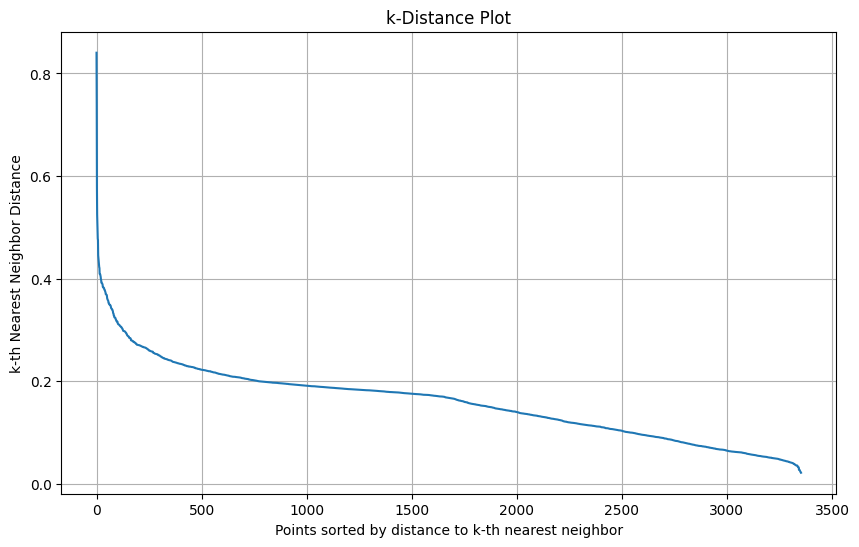

In [ ]:

num_features = len(features) 
minPts = 2 * num_features
k = minPts - 1
kth_distances = np.sort(dist, axis=1)[:, k]
plt.figure(figsize=(10, 6))
plt.plot(range(len(kth_distances)), sorted(kth_distances, reverse=True))
plt.xlabel('Points sorted by distance to k-th nearest neighbor')
plt.ylabel('k-th Nearest Neighbor Distance')
plt.title('k-Distance Plot')
plt.grid(True)
plt.show()


Now you have to determine values for the *epsilon* parameter. Based on the previous plot, perform DBSCAN where you vary *epsilon* in the interval (0.0, 0.3] by steps of 0.01.

Draw a diagram with the parameter *epsilon* (between 0.01 and 0.3) on the x-axis and the percentage of 
- clustered samples,
- samples in the largest component,
- and noise

on the y-axis.

In a second diagram, plot the number of clusters over *epsilon*.

Based on these diagrams, which value for *epsilon* seems to be most suitable? Explain your answer. 



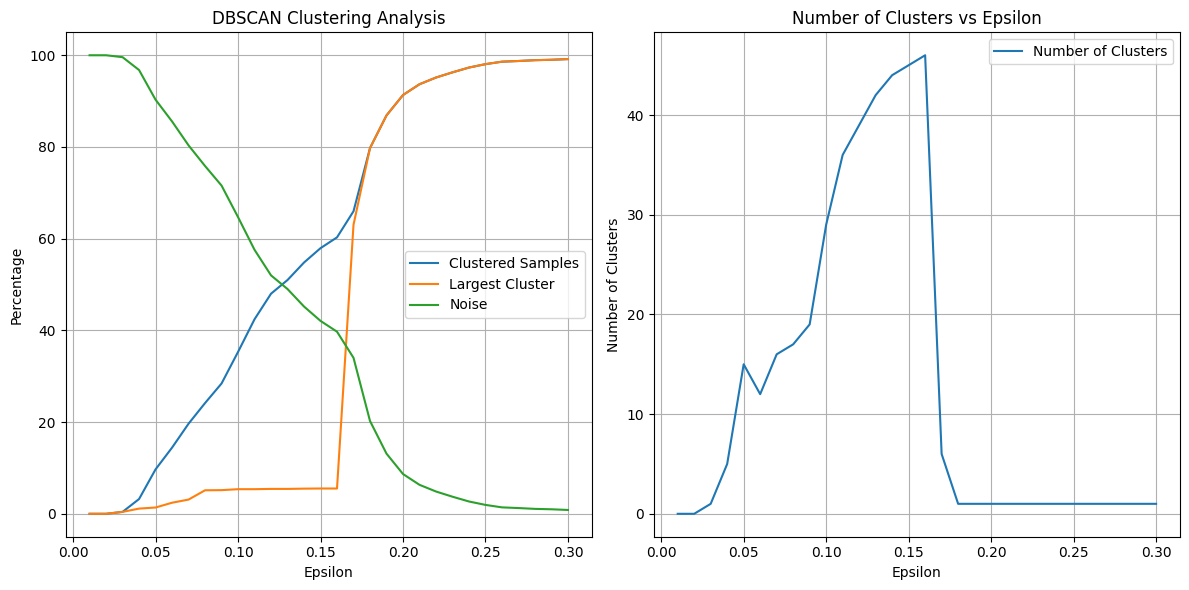

In [87]:
clustered_percentage = []
largest_cluster_percentage = []
noise_percentage = []
num_clusters = []
epsilon_values = np.arange(0.01, 0.31, 0.01)

for eps in epsilon_values:
    dbscan = DBSCAN(eps=eps, min_samples=minPts, metric='precomputed')
    labels = dbscan.fit_predict(dist)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    largest_cluster_size = max(np.bincount(labels[labels >= 0])) if n_clusters > 0 else 0
    clustered_percentage.append(100 * (len(labels) - n_noise) / len(labels))
    largest_cluster_percentage.append(100 * largest_cluster_size / len(labels))
    noise_percentage.append(100 * n_noise / len(labels))
    num_clusters.append(n_clusters)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epsilon_values, clustered_percentage, label='Clustered Samples')
plt.plot(epsilon_values, largest_cluster_percentage, label='Largest Cluster')
plt.plot(epsilon_values, noise_percentage, label='Noise')
plt.xlabel('Epsilon')
plt.ylabel('Percentage')
plt.title('DBSCAN Clustering Analysis')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(epsilon_values, num_clusters, label='Number of Clusters')
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs Epsilon')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Answer**: 

0.125 would be the most suitable value for epsilon. Reason: In the first diagram the noise is lowest while the percentage of clustered samples is high. 0.125 is the cutting point of both. In the second diagram we want epsilon to have a stable range where the numbers of clusters does not change too abruptly. Taking both diagrams into consideration would make 0.125 the best option.

**Note**: No matter the conclusion made in the previous task, from now on, use the clustering model with *epsilon = 1/6* for predicting the price of W.'s car and evaluating the clustering technique.

Apply DBSCAN clustering to your training set based on the provided distance matrix. Answer the following questions:
- How many clusters are identified?
- What is their average size?
- What is the size of the largest cluster (absolute and relative)?
- How large is the percentage of unclustered samples (noise)?



In [88]:
epsilon = 1/6
dbscan = DBSCAN(eps=epsilon, min_samples=minPts, metric='precomputed')
labels = dbscan.fit_predict(dist)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
cluster_sizes = np.bincount(labels[labels >= 0])
average_cluster_size = np.mean(cluster_sizes) if cluster_sizes.size > 0 else 0
largest_cluster_size = max(cluster_sizes) if cluster_sizes.size > 0 else 0
noise_percentage = 100 * list(labels).count(-1) / len(labels)
largest_cluster_relative_size = 100 * largest_cluster_size / len(labels)
print("Number of clusters identified:", n_clusters)
print("Average cluster size:", average_cluster_size)
print("Size of the largest cluster (absolute):", largest_cluster_size)
print("Size of the largest cluster (relative): {:.2f}%".format(largest_cluster_relative_size))
print("Percentage of unclustered samples (noise): {:.2f}%".format(noise_percentage))


Number of clusters identified: 40
Average cluster size: 51.75
Size of the largest cluster (absolute): 321
Size of the largest cluster (relative): 9.57%
Percentage of unclustered samples (noise): 38.28%


### (iv) Price prediction

Create a dataframe based on the training set where you assign each to each car the label of its corresponding cluster. Then, for each of the obtained clusters, compute their average price as an estimate. 



In [89]:
X_train_df = pd.DataFrame(X_train, columns=features, index=y_train.index)
X_train_df['Cluster'] = labels
X_train_df['Price'] = y_train
average_prices = X_train_df.groupby('Cluster')['Price'].mean()
average_prices

Cluster
-1     33746.545950
 0     37169.400826
 1     34767.532143
 2     43623.623053
 3     30018.549296
 4     45580.918239
 5     34591.468085
 6     30460.666667
 7     27376.761905
 8     63145.000000
 9     25938.207547
 10    42265.266667
 11    66614.548387
 12    93120.142857
 13    35596.833333
 14    17606.600000
 15    28790.968750
 16    23895.806452
 17    20857.904762
 18    59543.375000
 19    44504.517241
 20    15019.923077
 21    24500.448276
 22    21199.386364
 23    21398.500000
 24    27576.615385
 25    22421.342105
 26    31906.727273
 27    58037.782609
 28    41773.300000
 29    51632.133333
 30    49145.562500
 31    13597.923077
 32    18731.444444
 33    19557.416667
 34    41405.470588
 35    83038.785714
 36    22090.529412
 37    12149.937500
 38    18409.857143
 39    29825.000000
Name: Price, dtype: float64

Use your test set to evaluate your prediction. Therefore, estimate the price of each car in the test set based on an appropriate corresponding cluster. 

*Hint*: To do that, determine the labels of neighboring cars and assign a label to  each car of the test set as if it were a point still to cluster by DBSCAN. 

Based on the previously computed average price of each cluster and your function, give a price estimate for each car in the test set.

Compare your estimates with the true prices. What are the values of the mean absolute error and the root-mean-square error? 



*Note*: The distance matrix between test and training set is provided in `distance_test_to_train.txt`.

In [90]:
test_dist = np.genfromtxt("distance_test_to_train.txt", delimiter=",")

In [91]:
closest_training_indices = np.argmin(test_dist, axis=1)
test_labels = labels[closest_training_indices]
test_estimated_prices = [average_prices[cluster] if cluster != -1 else "Handle Separately" for cluster in test_labels]
test_estimated_prices_df = pd.DataFrame({'Estimated_Price': test_estimated_prices}, index=range(len(test_estimated_prices)))

handle_separately_replacement = y_train.mean()
test_estimated_prices = test_estimated_prices_df['Estimated_Price'].replace('Handle Separately', handle_separately_replacement)
mae = mean_absolute_error(y_test, test_estimated_prices)
rmse = mean_squared_error(y_test, test_estimated_prices, squared=False)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
test_estimated_prices_df

Mean Absolute Error: 20165.34923231355
Root Mean Squared Error: 30091.67564165045


,Estimated_Price
0,Handle Separately
1,44504.517241
2,Handle Separately
3,34591.468085
4,Handle Separately
...,...
172,Handle Separately
173,34591.468085
174,Handle Separately
175,Handle Separately


**Answer**:
Mean Absolute Error: 20165.
Root Mean Squared Error: 30092

Finally, to predict the price for the target car, find a cluster that contains cars with similar features. 

**Note**: The distance matrix between the target car and the training set is provided in `distance_car_to_train.txt`.

Show the cars within a distance of *epsilon* to W's car including all used features, their price and the label of their cluster.

Which cluster would you assign the target car to and what is the estimated price? Round to the second decimal. 



In [92]:
car_dist = np.genfromtxt("distance_car_to_train.txt", delimiter=",")

In [93]:
epsilon = 1/6
similar_cars_indices = np.where(car_dist <= epsilon)[0]
similar_cars = X_train_df.iloc[similar_cars_indices].copy()
similar_cars['Price'] = y_train.iloc[similar_cars_indices].values
similar_cars['Cluster'] = labels[similar_cars_indices]

similar_cars

,brand,milage,fuel_type,accident,clean_title,horsepower,Cluster,Price
1930,-0.540632,0.278249,40.0,3.0,1.0,1.0,2,72995
883,-0.419071,0.231928,40.0,3.0,1.0,1.0,2,62500
1483,1.076911,0.695142,40.0,3.0,1.0,1.0,2,17999
1721,-0.203696,-0.138644,40.0,3.0,1.0,1.0,2,45000
2988,-0.114442,1.065714,40.0,3.0,1.0,1.0,2,41000
1940,0.035525,0.139285,40.0,3.0,1.0,1.0,2,29500
1847,1.038104,0.880428,40.0,3.0,1.0,1.0,2,25000
3523,-0.523848,0.231928,40.0,3.0,1.0,1.0,2,66500
3187,-0.388026,0.278249,40.0,3.0,1.0,1.0,2,56000
1088,1.263297,0.741464,40.0,3.0,1.0,1.0,2,15000


**Answer**: 
Would assign it to cluster 2 with an average price of 43623.62


## (d) Prediction by regression and with neural networks

In this task, we build regression models and neural networks to predict the car prices.

Use the dataset *used_cars_preprocessed.csv* for this subtask as well as the next.

In [94]:
import pandas as pd
df = pd.read_csv("used_cars_preprocessed.csv")

### (i) Feature engineering

Run the code below that derives a feature *average_model_price* and adds it to the entries in the dataset and to the target car.

Do you expect that using this feature as a descriptive feature will be beneficial for the quality of price prediction models? Discuss possible advantages and disadvantages. 



*Hint:* You can also first play around with different feature selections in the model training tasks below below to get a feeling for the usefulness of features.

In [ ]:
average_model_prices = {
    model: df[df["model"] == model]["price"].mean()
    for model in set(df["model"].values)
}

df["average_model_price"] = df.apply(lambda row: average_model_prices[row["model"]], axis = 1)
car["average_model_price"] = car.apply(lambda row: average_model_prices[row["model"]], axis = 1)

**Answer:**
Advantages:
The average_model_price captures the average market value of each car model, which can be a strong indicator of an individual car's price. Different models often have significantly different price ranges, and this feature can help the model to differentiate between them more effectively. Furthermore for models with a large number of samples in the dataset, the average price would be a robust statistic, reducing the impact of outliers or anomalous data points.

Disadvantages:
This feature might lead the predictive model to overemphasize the car's model at the expense of other important features. And if some models are underrepresented in the dataset, the average price calculation for these models might not be reliable



### (ii) Feature selection

As descriptive features for the models trained in the following, use as categorical feature *accident* and as numerical features *model_year* and *milage*. Depending on your answer for task (i), make a choice whether to include or not to include *average_model_price*.

Beside these features, choose one of the three numerical features *horsepower*, *cylinders* and *litres* as another descriptive feature. Motivate your choice with the help of appropriate visualization techniques. 



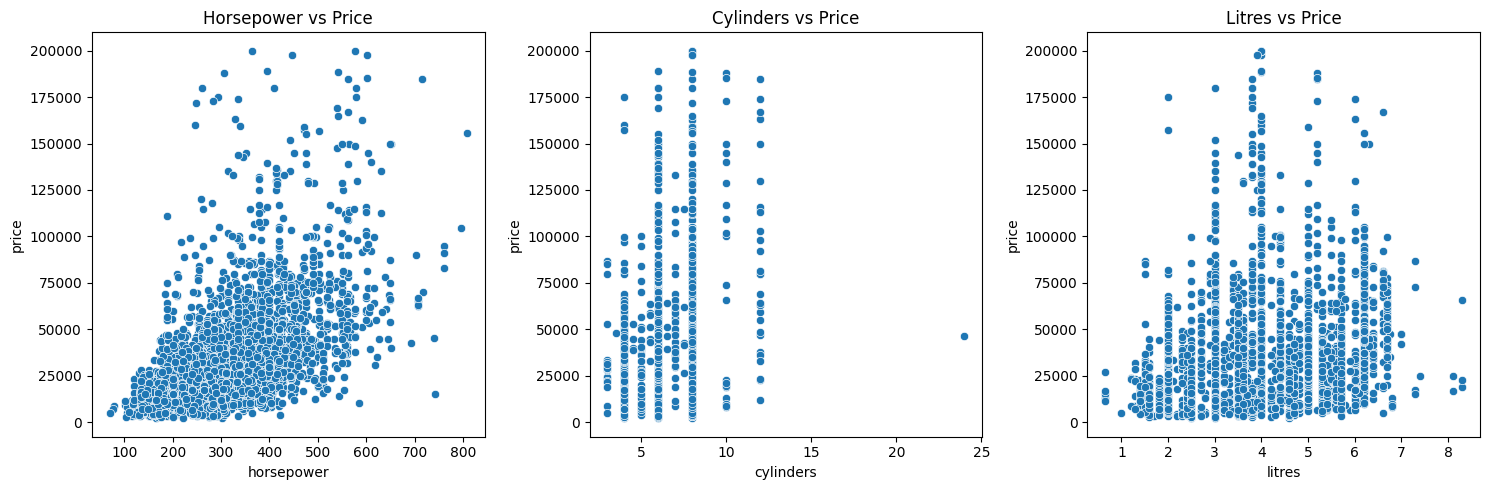

In [96]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Horsepower vs Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x='cylinders', y='price', data=df)
plt.title('Cylinders vs Price')

plt.subplot(1, 3, 3)
sns.scatterplot(x='litres', y='price', data=df)
plt.title('Litres vs Price')

plt.tight_layout()
plt.show()

**Answer**

Would choose the horsepower as another descriptive feature, since it shows the clearest trend or pattern in relation to the car price. The higher the horsepower the higher the price of the car will be generally.

### (iii) Data transformation for regression and neural networks

Use *accident*, *model_year* and *milage* as well as your selection from the previous task as descriptive features and *price* as the target feature. Create a test and training set like before, encoding the categorical feature. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. 

Normalize the training and test sets as well as the target car. Use the `StandardScaler` from *sklearn* for normalization.

*Hint:* Append the target car to the dataset during the encoding procedure.




In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df_with_target_car = pd.concat([df, car], ignore_index=True)

features = ['accident', 'model_year', 'milage', 'horsepower'] 
target = 'price'

ct = ColumnTransformer([
    ("onehot", OneHotEncoder(), ['accident']),
    ("pass-through", "passthrough", ['model_year', 'milage', 'horsepower'])
])
X = ct.fit_transform(df_with_target_car[features])
y = df_with_target_car[target]
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.05, random_state=3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
target_car_scaled = scaler.transform(X[-1].reshape(1, -1))

In the following, we will train and evaluate various models for price prediction using the *sklearn* library. To leverage the shared interface for models in the sklearn library, it is convenient to create a function for the model training and evaluation.

### (iv) Model training function

Implement the body of the function *model_training* below. The function should adhere to the following specification:

#### Input:
- **model**: A model (e.g., Linear Regression or Neural Network) of the sklearn library.
- **x_training_data**: The descriptive data to train the model.
- **y_training_data**: The corresponding values of target feature of the training data.
- **x_test_data**: The descriptive data to test the model.
- **y_test_data**: The corresponding values of target feature of the test data.
- **grid_params**: Model parameters for a grid search.

#### Output:
- **grid**: An object of the class sklearn.model_selection.GridSearchCV that was fitted against the training data. The training should follow a 5-fold cross-validation.
- **mean_abs_err**: The mean absolute error of the trained model on the passed test data.
- **rms_err**: The root-mean-square error of the trained model on the passed test data.
- **best_params**: The optimal parameter configuration, i.e., the parameters of the best scoring model that was selected by the grid search.



In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def model_training(model, x_training_data, y_training_data, x_test_data, y_test_data, grid_params):
    grid = None
    best_params = None
    mean_abs_err = None
    grid = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_absolute_error')
    grid.fit(x_training_data, y_training_data)
    best_params = grid.best_params_
    y_pred = grid.predict(x_test_data)
    mean_abs_err = mean_absolute_error(y_test_data, y_pred)
    rms_err = mean_squared_error(y_test_data, y_pred, squared=False)
    return grid, mean_abs_err, rms_err, best_params

### (v) Linear regression

Apply your function *model_training* to train a linear regressor. Show the errors (MAE, RMSE) and predict the price of the target car. 




In [100]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Define grid parameters (empty for basic linear regression)
grid_params = {}

# Apply the model training function
grid, mae, rmse, best_params = model_training(linear_model, 
                                               X_train_scaled, y_train, 
                                               X_test_scaled, y_test, 
                                               grid_params)

# Display the errors
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Predict the price of the target car
predicted_price = grid.predict(target_car_scaled)
print("Predicted Price of the Target Car:", predicted_price[0])


Mean Absolute Error: 13706.935327718593
Root Mean Squared Error: 21464.14516664464
Predicted Price of the Target Car: 41206.69174455271


Learning linear relationships only provides limited performance. Therefore, we will analyze non-linear relationships.

### (vi) Regression with non-linear kernels

Plot the _milage_ feature (x-Axis) in the data against the _price_ feature (y-Axis). 

Based on the curve, what kernel functions could be used to transform the milage feature? Suggest at least two possible kernel functions. 




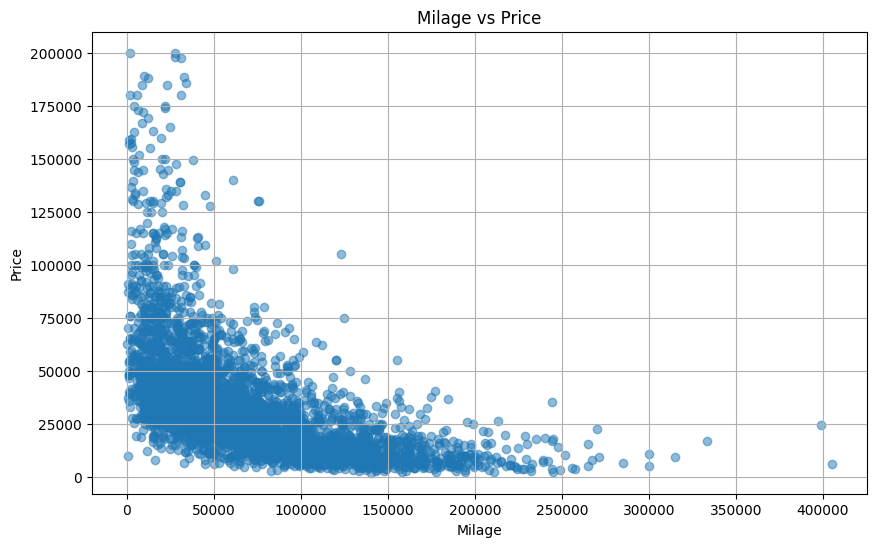

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(df['milage'], df['price'], alpha=0.5)
plt.title('Milage vs Price')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**Answer:**

The polynomial kernenl or the gaussian kernel.

For each kernel function, create a copies of your normalized train sets, test sets and the normalized target car, and extend them with the transformed *milage* feature. Call the _model_training_ function with a linear regression model. Show the errors (MAE, RMSE) and predict the price of the target car. Which of the kernels performs best?



In [105]:
def polynomial_transform(x, degree=2):
    return np.power(x, degree)
def rbf_transform(x, gamma=0.1):
    return np.exp(-gamma * np.power(x, 2))

features = ['accident', 'model_year', 'milage', 'horsepower']  
num_categorical_features = 1 
milage_index_original = features.index('milage')
milage_index = milage_index_original - num_categorical_features

X_train_poly = np.column_stack((X_train_scaled, polynomial_transform(X_train_scaled[:, milage_index])))
X_test_poly = np.column_stack((X_test_scaled, polynomial_transform(X_test_scaled[:, milage_index])))
target_car_poly = np.column_stack((target_car_scaled, polynomial_transform(target_car_scaled[:, milage_index])))
grid_poly, mae_poly, rmse_poly, _ = model_training(LinearRegression(), X_train_poly, y_train, X_test_poly, y_test, {})
predicted_price_poly = grid_poly.predict(target_car_poly)
X_train_rbf = np.column_stack((X_train_scaled, rbf_transform(X_train_scaled[:, milage_index])))
X_test_rbf = np.column_stack((X_test_scaled, rbf_transform(X_test_scaled[:, milage_index])))
target_car_rbf = np.column_stack((target_car_scaled, rbf_transform(target_car_scaled[:, milage_index])))
grid_rbf, mae_rbf, rmse_rbf, _ = model_training(LinearRegression(), X_train_rbf, y_train, X_test_rbf, y_test, {})
predicted_price_rbf = grid_rbf.predict(target_car_rbf)
print("Polynomial Kernel - MAE:", mae_poly, "RMSE:", rmse_poly, "Predicted Price:", predicted_price_poly[0])
print("RBF Kernel - MAE:", mae_rbf, "RMSE:", rmse_rbf, "Predicted Price:", predicted_price_rbf[0])

Polynomial Kernel - MAE: 13694.20197740113 RMSE: 21465.77220966447 Predicted Price: 41166.25
RBF Kernel - MAE: 13712.79872881356 RMSE: 21464.665112839248 Predicted Price: 41214.125


**Answer:**

the polynomial kernel perform the best, since its mae is lower. The rmse is lower for the rbf kernel, but only by about 1.0. 

### (vii) Neural networks

While you are working on your predictive models, N. walks by. With a critical look on your screen, N. says: "Linear regression is so boring. Nowadays, deep learning is all the rage. Ever heard of ChatGPT and transformer models? Come on, at least you should train a neural network. Watch me, I'll show you," N. says, grabs your keyboard and starts typing.

In [107]:
### Provided Code (do not change!)
from sklearn.neural_network import MLPRegressor

normalized_car = target_car_scaled
normalized_x_train = X_train_scaled
normalized_x_test = X_test_scaled

param_grid_nn = {'activation': ['identity'],
              "early_stopping": [True],
              "validation_fraction": [0.1],
              "learning_rate": ["adaptive"],
              'solver' : ['lbfgs'],
              'hidden_layer_sizes': [(2,1), (5,1), (20,1), (100,5)]
             }
grid_nn, mean_abs_err_nn, rms_err_nn, best_params_nn = model_training(
    MLPRegressor(max_iter = 10000), normalized_x_train, y_train, normalized_x_test, y_test, param_grid_nn
)
print("Mean absolute error: {}".format(mean_abs_err_nn))
print("Root-mean-square error: {}".format(rms_err_nn))
print("Predicted Price of the target car: {}".format(grid_nn.predict(normalized_car)))
print("Params of best model: {}".format(best_params_nn))

Mean absolute error: 13698.614263531286
Root-mean-square error: 21448.80804612974
Predicted Price of the target car: [41284.84473574]
Params of best model: {'activation': 'identity', 'early_stopping': True, 'hidden_layer_sizes': (100, 5), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'validation_fraction': 0.1}


Execute the code above and interpret the result in comparison to your previous results. In particular, discuss the choice of the activation function and the size of the hidden layers.

*Hint:* Set the verbose parameter of the grid search (e.g. , to 3) to get more detailed information on the model training.



**Answer:**

the mae is actually 4 points higher than with the polynomial kernel, but the RMSE is lower by 16 points. Furthermore the predicted price is a bit higher compared to the kernels output. The hidden layer size of (100, 5) indicates a relatively complex model with 100 neurons in the first layer and 5 in the second. This complexity might be necessary to capture subtler patterns in the data, but there is a risk of overfitting, especially if the dataset is not large. The 'identity' activation function means no transformation is applied at the nodes. This is interesting since neural networks are typically used for capturing non-linearity. It might suggest that the relationships in the data aren't strongly non-linear or that other features already capture necessary non-linearities.

## (e) Discussion 

Summarize your findings and discuss limitations of the different prediction approaches. In your discussion, not only refer to the predicted price of the running example and the confidence of your prediction, but also to the methods in general.

- Based on the general methodologies, which approach would you prefer and why?
- Which approach performed best on the given example?
- Are your results consistent with this view?
- How would you explain the margin of errors in each approach?
- What can you deduce from the differences between MAE and RMSE?
- Are there limitations regarding the comparability of the approaches?

  


**Answer:**

Would prefer the neural network approach, since nns are more powerful, but keep in mind that it also requires more data and computational resources.

The nns, since the rmse was much lower than for the kernels. 

The mae is lower for the polynomial kernel, but only by 4.0. The rmse of the nns is much smaller than those of the kernels, by about 16.0.

the large errors in linear regression indicates non-linear relationship. The large error in nns could be a sign of overfitting or underfitting. the large errors in non-linear regression might be because of not well chosen parameters.

Mae gives a straightforward average error per prediction. Rmse gives higher weight to larger errors, which can be informative if large errors are undesirable. A large discrepancy between MAE and RMSE suggests the presence of some significant errors in the predictions.

The complexity of tuning and the risk of overfitting vary across methods. Neural networks and non-linear regression require more careful tuning than linear regression. Furthermore different approached require different preprocessing steps.


Having completed your extensive work on predicting prices, you give W. a call to report your findings. W. is excited to hear about your results, and promises to consider your suggestions. 


# Q4: Predicting time-to-sale

**AutoSell** has just rented a small area parking area in front of the facility with unused space for ten cars. Your new project is an exhibition of selected cars on that space. For a one-time commission, sellers can drive up their car there and your company will market the car also locally.

To maximize turnover by commissions, your business strategy is to exhibit cars there that are likely to be resold quickly. You decide that the cars on display should have an expected selling time of at most 30 days.

## (a) Data preparation 

In this task, we use the dataset **used_cars_reselling_states.csv**. This is an extension of the working dataframe used so far, also describing when a car has been registered for reselling (*registration_date*), when it was successfully resold (*reselling_date*), and the number of days from registration to reselling (*reselling_time*).

Run the code below. The code loads the dataframe, filters out instances without a well-defined outcome for our classification problem, and applies oversampling to the dataframe to circumvent a class imbalance problem.

In [1]:
### Provided Code (do not change!)
import pandas as pd
df = pd.read_csv("used_cars_reselling_states.csv")
df.dropna(subset=["reselling_date"], inplace=True)

# Oversample to circumvent class imbalance 
df_fast = df[df['reselling_time'] <= 30]
df_notfast = df[df['reselling_time'] > 30]
sample_size = len(df_notfast) - len(df_fast)
random_sample = df_fast.sample(n=sample_size, replace=True)
df = pd.concat([df, random_sample], ignore_index=True)

### (i) Target feature creation

Use the column *reselling_time* to define a binary categorical (boolean) feature according to the description above and append this feature to the dataframe. 



In [2]:
df['fast_resell'] = (df['reselling_time'] <= 30)
print(df[['reselling_time', 'fast_resell']].head())

   reselling_time  fast_resell
0             8.0         True
1             4.0         True
2             7.0         True
3            73.0        False
4             0.0         True


### (ii) Sensitivity and Specificity

You have learned about various quality metrics for classifiers.

Briefly illustrate the terms *sensitivity* and *specificity* in the context of the classification problem of fast reselling cars. Suggest which of these metrics is more important for the classifier and provide a justified reason for your suggestion. 



**Answer:**

Sensitivity - proportion of real positive cases correctly identified by the classifier. In the context of fast reselling cars, high sensitivity would means the classifier is effective at correctly identifying cars that have the potential for fast resale.

Specificity - proportion of real negative cases correctly identified by the classifier. In the context of fast reselling cars, high specificity means that the classifier is effective at correctly identifying cars that do not have the potential for fast resale.

In case of the fast reselling cars specificity is more important, because it is okay to miss out on a few correctly predicted actual positive cases given that a lot of actual negative cases are identified correctly.


### (iii) Data transformation for classification problem

Use *milage*, *model_year* and *price* as descriptive features and your binary feature as the target feature. Create a test and training set like before. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. 

Normalize the training and test sets. Use the `StandardScaler` from *sklearn* for normalization.



In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['milage', 'model_year', 'price']]
y = df['fast_resell']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=3)

scaler = StandardScaler()

# Fit training and test data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

print(pd.DataFrame(X_train_normalized, columns=['mileage', 'model_year', 'price']).head())


    mileage  model_year     price
0  1.910279    0.071455 -0.698849
1 -0.748631   -2.237183 -0.571048
2  0.285277   -2.947533 -0.917175
3 -0.335700    0.426631 -0.442360
4 -0.035210    0.604218  0.635923


## (b) Classifiers

### (i) Model training

Train two classifiers: 
- A Logistic Regressor,
- A Support Vector Machine.

 

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regressor
logistic_regressor = LogisticRegression(random_state=3)
logistic_regressor.fit(X_train_normalized, y_train)

# Support Vector Machine
svm_classifier = SVC(random_state=3)
svm_classifier.fit(X_train_normalized, y_train)

SVC(random_state=3)

### (ii) Evaluation, Part 1

For both classifiers, show the confusion matrix. 



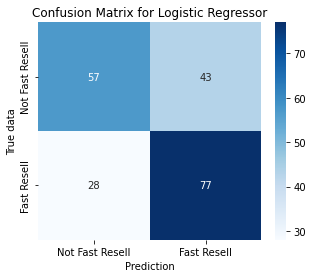

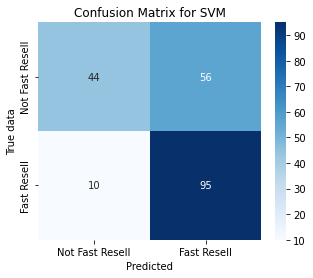

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regressor
y_pred_logistic = logistic_regressor.predict(X_test_normalized)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix for Logistic Regressor
plt.figure(figsize=(5, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fast Resell', 'Fast Resell'],
            yticklabels=['Not Fast Resell', 'Fast Resell'])
plt.title('Confusion Matrix for Logistic Regressor')
plt.xlabel('Prediction')
plt.ylabel('True data')
plt.show()

# Support Vector Machine (SVM)
y_pred_svm = svm_classifier.predict(X_test_normalized)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fast Resell', 'Fast Resell'],
            yticklabels=['Not Fast Resell', 'Fast Resell'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True data')
plt.show()

Compute, if possible, precision, recall and F1-score of each classifier. Also, compute sensitivity and specificity of each classifier.



In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Logistic Regressor
print("Logistic Regressor:")
print(f"Precision: {precision_score(y_test, y_pred_logistic)}")
print(f"Recall: {recall_score(y_test, y_pred_logistic)}")
print(f"F1-score: {f1_score(y_test, y_pred_logistic)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}")
print(f"Sensitivity: {confusion_matrix(y_test, y_pred_logistic)[1, 1] / (confusion_matrix(y_test, y_pred_logistic)[1, 1] + confusion_matrix(y_test, y_pred_logistic)[1, 0])}")
print(f"Specificity: {confusion_matrix(y_test, y_pred_logistic)[0, 0] / (confusion_matrix(y_test, y_pred_logistic)[0, 0] + confusion_matrix(y_test, y_pred_logistic)[0, 1])}")

print("")

# Support Vector Machine (SVM)
print("SVM:")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(f"F1-score: {f1_score(y_test, y_pred_svm)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Sensitivity: {confusion_matrix(y_test, y_pred_svm)[1, 1] / (confusion_matrix(y_test, y_pred_svm)[1, 1] + confusion_matrix(y_test, y_pred_svm)[1, 0])}")
print(f"Specificity: {confusion_matrix(y_test, y_pred_svm)[0, 0] / (confusion_matrix(y_test, y_pred_svm)[0, 0] + confusion_matrix(y_test, y_pred_svm)[0, 1])}")


Logistic Regressor:
Precision: 0.6416666666666667
Recall: 0.7333333333333333
F1-score: 0.6844444444444444
Accuracy: 0.6536585365853659
Sensitivity: 0.7333333333333333
Specificity: 0.57

SVM:
Precision: 0.6291390728476821
Recall: 0.9047619047619048
F1-score: 0.7421875
Accuracy: 0.6780487804878049
Sensitivity: 0.9047619047619048
Specificity: 0.44


Would you choose any of the trained classifiers for application on the described problem? If yes, which one? Justify your answer.



**Answer:**

As we are interested in identifying the fastest reselling cars, we should look at the "Recall" and "Sensitivity" metrics and we can conclude that SVM performs better than Logistic Regressor.

### (iii) Evaluation, Part 2

Besides the *predict* method to decide for the class label of an instance, a `LogisticRegression` model from *sklearn* offers the method `predict_proba`. This method takes a list of instances to be classified and returns a list of tuples. Each tuple has two entries: The first entry is the probability for the respective instance to be classified as negative and the second entry is the probability for the instance to be classified as positive. Thus, the entries of each tuple sum up to 1.

As you learned in the lecture, we can vary the outcome of a logistic regression classifer by setting a threshold. Instances are labeled as positive if their probability for a positive label is greater than or equal to the threshold.

Define the body of the function *threshold_to_rates* below. This function receives a threshold between 0 and 1, and then classifies the test data based on the threshold and the outcome of the instances under the `predict_proba` method of your trained classifier. The function must return a tuple where the first entry is the true positive rate and the second entry is the false positive rate with respect to the given configuration.

**Input**:
- **h**: A real number within the interval $[0,1]$.

**Output**:
- **TPR**: The true positive rate of your test data set, based on the given threshold.
- **FPR**: The false positive rate of your test data set, based on the given threshold. 



In [8]:
def threshold_to_rates(h):
    tpr = 0
    fpr = 0

    global logistic_regressor, X_test_normalized, y_test

    # Get predicted probabilities for the logistic regressor
    y_prob = logistic_regressor.predict_proba(X_test_normalized)[:, 1]

    # Classify based on the threshold
    y_pred = (y_prob >= h).astype(int)

    # TPR
    tpr = sum((y_pred == 1) & (y_test == 1)) / sum(y_test == 1)
    # FPR
    fpr = sum((y_pred == 1) & (y_test == 0)) / sum(y_test == 0)

    # # # # # # # # # #
    return (tpr, fpr)

threshold = 0.5
tpr, fpr = threshold_to_rates(threshold)
print(f"TPR: {tpr}")
print(f"FPR: {fpr}")

TPR: 0.7333333333333333
FPR: 0.43


Having specified the *threshold_to_rates* function, execute the code box below to plot the ROC curve of your classifier.

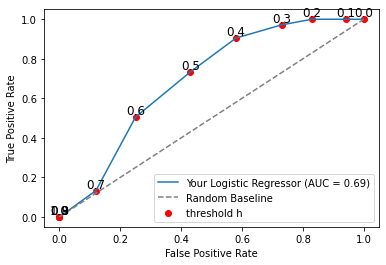

In [9]:
# Given code (Do not change)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
steps =  np.arange(1.0, -0.1, -0.1)
steps = [round(h*10)/10 for h in steps]
data = {
    h : threshold_to_rates(h)
    for h in steps
}

fpr = [data[h][1] for h in steps]
tpr = [data[h][0] for h in steps]

roc_auc = metrics.auc(fpr, tpr)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Your Logistic Regressor')
roc_display.plot()

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Baseline')
plt.scatter(fpr, tpr, color='red', marker='o', label='threshold h')
for i, label in enumerate(steps):
    plt.text(fpr[i], tpr[i], label, fontsize=12, ha='center', va='bottom')

plt.legend()
plt.show()

Interpret the plot. Is there a threshold you would choose for the application of the classifier on the described problem? Justify your answer.



**Answer:**

As a threshold is between 0.9 and 0.7 the classifier makes false predictions, then if we decrease it to 0.6, 0.5, 0.4, 0.3 the classifier is more permissive and at 0.1 and 0 all the instances are classified as positive. Since we are interested in the most accurate predictions we should take a look at the middle of the threshold values, meaning 0.6 - 0.4 are the most optimal threshold values.

## (c) Discussion 

Summarize your findings. Discuss limitations and improvement potentials. 



**Answer:**

We have taken a look at two classifiers, such as: logistic regressor and support vector machine, the metrics: precision, recall, F1-score, sensitivity and specificity of each classifier and evaluated each of classifiers for the TPR and FPR metrics.

Each of the classifers provides valuable insights into the data in the context fast reselling cars. Each classifier has its advantages and shortcomings, for example logistic regression is more vulnerable for overfitting. In our particular case SVM performed better judging by its "Recall" and "Sensitivity" metrics which were crucial in case of the fast reselling cars.